## Load Libraries & Dataset

In [67]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [43]:
# ==================
# Load Dataset
# ===================

dataset_path = r"data\finalData\customer_training.csv"
df = pd.read_csv(dataset_path, sep = ',')
df.head()

,customer_unique_id,recency,frequency,monetary,zip_code,city,state,total_items_volume,max_delivery_delay,is_delivered,is_approved,payment_method_count,primary_payment_type,max_installments,avg_satisfaction,min_review_score,total_reviews_given,label
0,0006fdc98a402fceb4eb0ee528f6a8d4,232,1,29.00,29400,mimoso do sul,ES,1,-12,1,1,1,credit_card,2,3.0,3,1,1
1,000c8bdb58a29e7115cfc257230fb21b,85,1,29.00,31555,belo horizonte,MG,1,-9,1,1,1,credit_card,2,5.0,5,1,1
2,001f3c4211216384d5fe59b041ce1461,353,1,35.84,8240,sao paulo,SP,1,-11,1,1,1,credit_card,3,3.0,3,1,1
3,002cdf87d4c03f08f7eb4551a923affc,127,1,228.67,13183,hortolandia,SP,1,14,1,1,1,credit_card,10,1.0,1,1,1
4,002d71b244beb91ca7030b15ab526446,289,1,130.56,18900,santa cruz do rio pardo,SP,1,-12,1,1,1,boleto,1,5.0,5,1,1


## Dataset Structure & Info

In [44]:
df.shape

(55245, 18)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55245 entries, 0 to 55244
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_unique_id    55245 non-null  object 
 1   recency               55245 non-null  int64  
 2   frequency             55245 non-null  int64  
 3   monetary              55245 non-null  float64
 4   zip_code              55245 non-null  int64  
 5   city                  55245 non-null  object 
 6   state                 55245 non-null  object 
 7   total_items_volume    55245 non-null  int64  
 8   max_delivery_delay    55245 non-null  int64  
 9   is_delivered          55245 non-null  int64  
 10  is_approved           55245 non-null  int64  
 11  payment_method_count  55245 non-null  int64  
 12  primary_payment_type  55245 non-null  object 
 13  max_installments      55245 non-null  int64  
 14  avg_satisfaction      55245 non-null  float64
 15  min_review_score   

**Interpretation**

* 55,245 rows → large enough for statistical reliability
* No duplicated customer_unique_id
* Mix of:
    * Numerical features
    * Categorical features
    * Binary indicators
* No missing values


In [61]:
# Count unique values for each column
unique_counts = df.nunique()
pd.set_option('display.max_rows', None)
# Display the count of unique values for each column
print("Count of Unique Values for Each Column:")
print(unique_counts)

Count of Unique Values for Each Column:
customer_unique_id      55245
recency                   366
frequency                   8
monetary                18339
zip_code                13131
city                     3542
state                      27
total_items_volume         17
max_delivery_delay         62
is_delivered                2
is_approved                 1
payment_method_count       19
primary_payment_type        4
max_installments           22
avg_satisfaction           32
min_review_score            5
total_reviews_given         9
label                       2
log_monetary            18224
log_delivery_delay         32
dtype: int64


In [65]:
# Function to find special characters in a column
def special_chars_in_column(series, pattern=None):
    if pattern is None:
        pattern = r'[@_!#$%^&*()<>?/\|}{~:]'
    regex = re.compile(pattern)
    # Extract all special characters in the column
    all_chars = series.astype(str).apply(lambda x: regex.findall(x))
    # Flatten list and get unique characters
    unique_chars = set([char for sublist in all_chars for char in sublist])
    return unique_chars

# Columns to exclude (e.g., date/time)
exclude_cols = ['date']

# Iterate and check each column
for col in df.columns:
    if col.lower() not in exclude_cols:
        chars_found = special_chars_in_column(df[col])
        if chars_found:
            print(f"Special characters found in column '{col}': {chars_found}")
        else:
            print(f"No special characters in column '{col}'")

No special characters in column 'customer_unique_id'
No special characters in column 'recency'
No special characters in column 'frequency'
No special characters in column 'monetary'
No special characters in column 'zip_code'
No special characters in column 'city'
No special characters in column 'state'
No special characters in column 'total_items_volume'
No special characters in column 'max_delivery_delay'
No special characters in column 'is_delivered'
No special characters in column 'is_approved'
No special characters in column 'payment_method_count'
Special characters found in column 'primary_payment_type': {'_'}
No special characters in column 'max_installments'
No special characters in column 'avg_satisfaction'
No special characters in column 'min_review_score'
No special characters in column 'total_reviews_given'
No special characters in column 'label'
No special characters in column 'log_monetary'
No special characters in column 'log_delivery_delay'


Special characters found in column 'primary_payment_type': {'_'} --> **credit_card**; Not big deal

In [62]:
# Count of columns
num_columns = len(df.columns)

# Identify numerical int, float and categorical columns
numerical_int_columns = df.select_dtypes(include=['int32', 'int64']).columns
numerical_float_columns = df.select_dtypes(include=[ 'float32', 'float64']).columns
categorical_columns = df.select_dtypes(include='object').columns

# Display information
print(f"Total columns: {num_columns}")

if len(numerical_int_columns) > 0:
    print(f"Numerical integer columns ({len(numerical_int_columns)}): {', '.join(numerical_int_columns)}")
else:
    print("No numerical integer columns found.")

if len(numerical_float_columns) > 0:
    print(f"Numerical float columns ({len(numerical_float_columns)}): {', '.join(numerical_float_columns)}")
else:
    print("No numerical float columns found.")

if len(categorical_columns) > 0:
    print(f"Categorical columns ({len(categorical_columns)}): {', '.join(categorical_columns)}")
else:
    print("No categorical columns found.")

Total columns: 20
Numerical integer columns (12): recency, frequency, zip_code, total_items_volume, max_delivery_delay, is_delivered, is_approved, payment_method_count, max_installments, min_review_score, total_reviews_given, label
Numerical float columns (4): monetary, avg_satisfaction, log_monetary, log_delivery_delay
Categorical columns (4): customer_unique_id, city, state, primary_payment_type


## Univariate Analysis (Numerical)

In [49]:
df.describe()

,recency,frequency,monetary,zip_code,total_items_volume,max_delivery_delay,is_delivered,is_approved,payment_method_count,max_installments,avg_satisfaction,min_review_score,total_reviews_given,label
count,55245.000000,55245.000000,55245.000000,55245.000000,55245.000000,55245.000000,55245.00000,55245.0,55245.000000,55245.000000,55245.000000,55245.000000,55245.000000,55245.000000
mean,146.718689,1.032166,162.622415,36164.662666,1.176957,-10.210788,0.97703,1.0,1.049018,3.006173,4.049282,4.037795,1.031641,0.988198
std,101.066418,0.200907,220.155988,29872.138642,0.607231,10.761392,0.14981,0.0,0.418796,2.777489,1.348617,1.360637,0.274501,0.107995
min,0.000000,1.000000,10.070000,1004.000000,1.000000,-30.000000,0.00000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,59.000000,1.000000,62.780000,12225.000000,1.000000,-16.000000,1.00000,1.0,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000
50%,124.000000,1.000000,106.290000,26033.000000,1.000000,-12.000000,1.00000,1.0,1.000000,2.000000,5.000000,5.000000,1.000000,1.000000
75%,226.000000,1.000000,180.610000,60541.000000,1.000000,-7.000000,1.00000,1.0,1.000000,4.000000,5.000000,5.000000,1.000000,1.000000
max,365.000000,9.000000,13664.080000,99990.000000,21.000000,31.000000,1.00000,1.0,29.000000,24.000000,5.000000,5.000000,9.000000,1.000000


### Challenge One
**Here, I need to handle the **max_delivery_delay** feature again by clipping. This requires reconstructing the data for a second time. The table represents the results from my first run of the `describe()` function.**

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>recency</th>
      <th>frequency</th>
      <th>monetary</th>
      <th>zip_code</th>
      <th>total_items_volume</th>
      <th>max_delivery_delay</th>
      <th>is_delivered</th>
      <th>is_approved</th>
      <th>payment_method_count</th>
      <th>max_installments</th>
      <th>avg_satisfaction</th>
      <th>min_review_score</th>
      <th>total_reviews_given</th>
      <th>label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>37679.000000</td>
      <td>37679.000000</td>
      <td>37679.000000</td>
      <td>37679.000000</td>
      <td>37679.000000</td>
      <td>37679.000000</td>
      <td>37679.000000</td>
      <td>37679.0</td>
      <td>37679.000000</td>
      <td>37679.000000</td>
      <td>37679.000000</td>
      <td>37679.000000</td>
      <td>37679.000000</td>
      <td>37679.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>94.331564</td>
      <td>1.017065</td>
      <td>167.298032</td>
      <td>33535.950052</td>
      <td>1.162372</td>
      <td>-9.871573</td>
      <td>0.982802</td>
      <td>1.0</td>
      <td>1.037395</td>
      <td>2.833488</td>
      <td>4.167447</td>
      <td>4.161814</td>
      <td>1.012739</td>
      <td>0.983943</td>
    </tr>
    <tr>
      <th>std</th>
      <td>50.897652</td>
      <td>0.139386</td>
      <td>232.445767</td>
      <td>29613.031874</td>
      <td>0.586908</td>
      <td>17.472701</td>
      <td>0.130010</td>
      <td>0.0</td>
      <td>0.305144</td>
      <td>2.620630</td>
      <td>1.285045</td>
      <td>1.291239</td>
      <td>0.175756</td>
      <td>0.125695</td>
    </tr>
    <tr>
      <th>min</th>
      <td>0.000000</td>
      <td>1.000000</td>
      <td>9.590000</td>
      <td>1003.000000</td>
      <td>1.000000</td>
      <td>-71.000000</td>
      <td>0.000000</td>
      <td>1.0</td>
      <td>1.000000</td>
      <td>0.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>46.000000</td>
      <td>1.000000</td>
      <td>63.230000</td>
      <td>9371.000000</td>
      <td>1.000000</td>
      <td>-17.000000</td>
      <td>1.000000</td>
      <td>1.0</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>4.000000</td>
      <td>4.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>96.000000</td>
      <td>1.000000</td>
      <td>109.380000</td>
      <td>22631.000000</td>
      <td>1.000000</td>
      <td>-11.000000</td>
      <td>1.000000</td>
      <td>1.0</td>
      <td>1.000000</td>
      <td>2.000000</td>
      <td>5.000000</td>
      <td>5.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>138.000000</td>
      <td>1.000000</td>
      <td>182.855000</td>
      <td>54485.000000</td>
      <td>1.000000</td>
      <td>-6.000000</td>
      <td>1.000000</td>
      <td>1.0</td>
      <td>1.000000</td>
      <td>4.000000</td>
      <td>5.000000</td>
      <td>5.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>180.000000</td>
      <td>7.000000</td>
      <td>7274.880000</td>
      <td>99980.000000</td>
      <td>24.000000</td>
      <td>106.000000</td>
      <td>1.000000</td>
      <td>1.0</td>
      <td>15.000000</td>
      <td>24.000000</td>
      <td>5.000000</td>
      <td>5.000000</td>
      <td>7.000000</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
</div>

In [50]:
# Check churn rate
churn_counts = df['label'].value_counts(normalize=True) * 100
print("\n--- Churn Rate ---")
print(churn_counts)


--- Churn Rate ---
label
1    98.819803
0     1.180197
Name: proportion, dtype: float64


### Challenge Two
This result is my first check of the dataset. Whene ever I got the result:
<pre>--- Churn Rate ---
label
1    98.394331
0     1.605669
Name: proportion, dtype: float64
</pre>
It represent the dataset is not fit for ML modeling for higly embalence data. Then I back to to my `data Construction` file and check again is there any mistake I did, also I try locate what's going on. After few research, I understand I didn't make a "coding" mistake, but I made a "logic" choice that creates a very difficult situation for a Machine Learning model. I defined my label as: 1 (Churn) if frequency == 1, otherwise 0. That's create a problem for static rule. Suppose *A customer who bought 179 days ago and never came back is a "True Churn." A customer who bought 2 days ago and hasn't come back yet is "Pending"—they haven't had time to buy again!*. An intereting business logic.
* My Logic: "Did they buy more than once?"
* ML Goal: "Will a customer who just bought today come back in the next 3 months?"

To make this predictive, I shouldn't use the whole 180 days for both features and labels. I should use a Temporal Split:
* Observation Window (e.g., first 120 days): Calculate RFM, delivery delays and other features here.
* Label Window (the remaining 60 days): 
    * See if the customer appears in these 60 days.If they are in the first 120 days but NOT in the last 60 days $\rightarrow$ Churn (1).
    * If they are in both $\rightarrow$ Retained (0).
**Output: Due to data limitations, I could not address the class imbalance; however, I learned how to obtain more reliable results by properly avoiding data leakage.**

### Target Variable Analysis



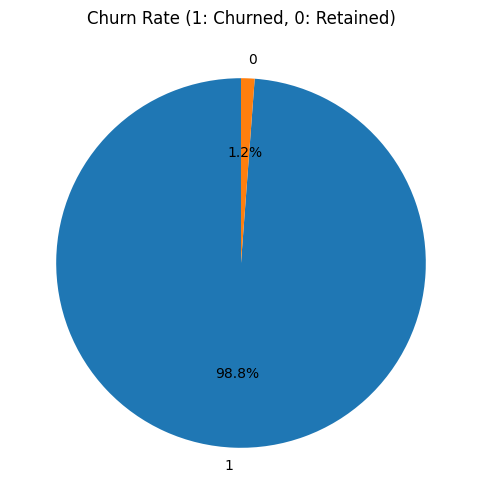

In [51]:
# 1. Visualization: Churn Rate
plt.figure(figsize=(6, 6))
churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate (1: Churned, 0: Retained)')
plt.ylabel('')
plt.show()

Message: Highly embalence data, a major modeling challenge. I need to focuse on Class weights, SMOTE / undersampling, Precision-Recall instead of accuracy
**Distribution Plots**

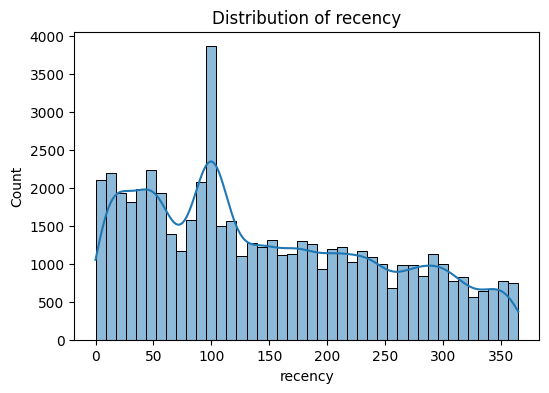

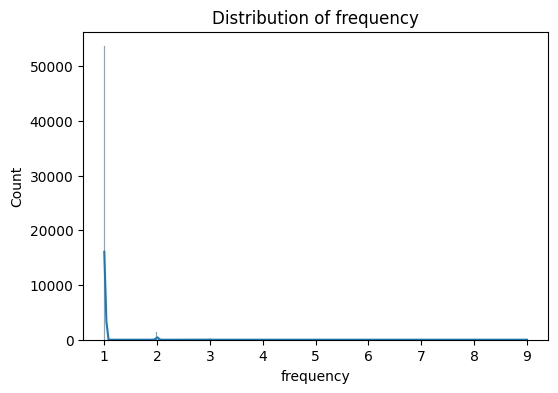

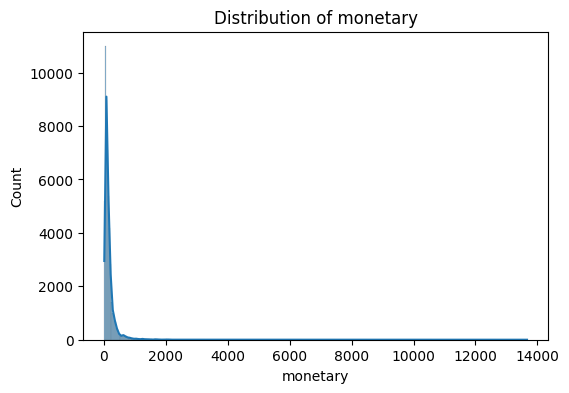

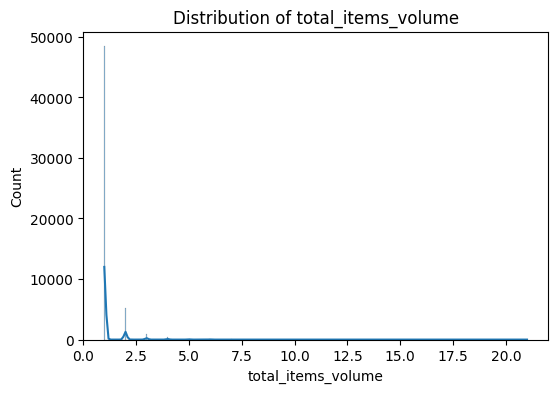

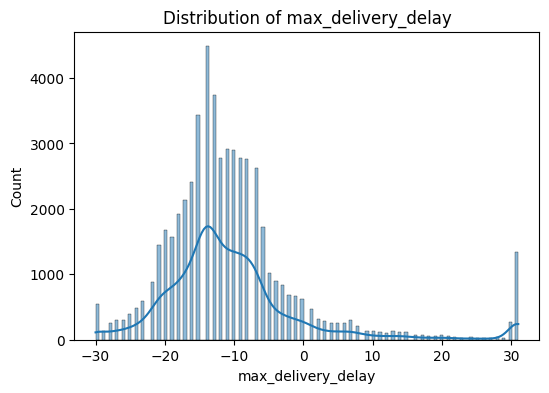

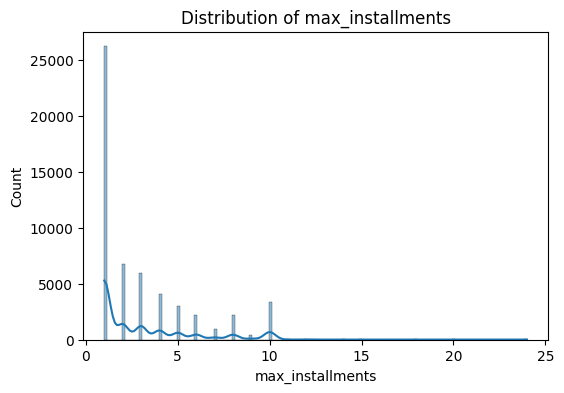

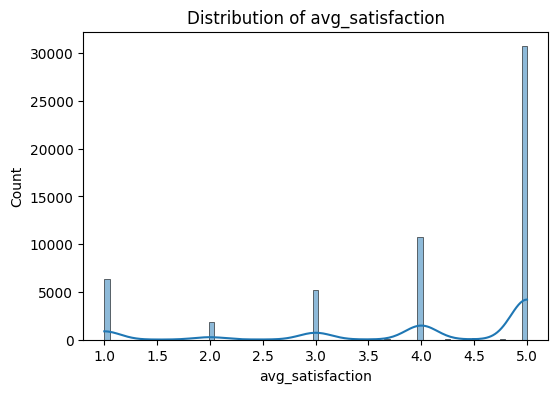

In [52]:
num_cols = [
    'recency', 'frequency', 'monetary',
    'total_items_volume', 'max_delivery_delay',
    'max_installments', 'avg_satisfaction'
]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

**Interpretation**
* Monetary & delivery delay are heavily skewed
* Frequency is highly imbalanced
* Satisfaction scores are mostly positive

### Categorical Feature Analysis

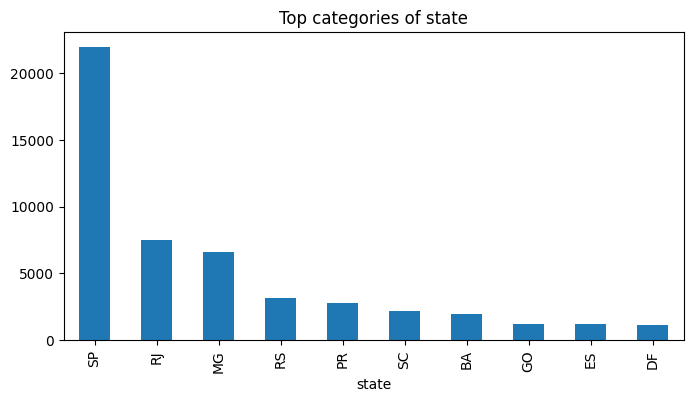

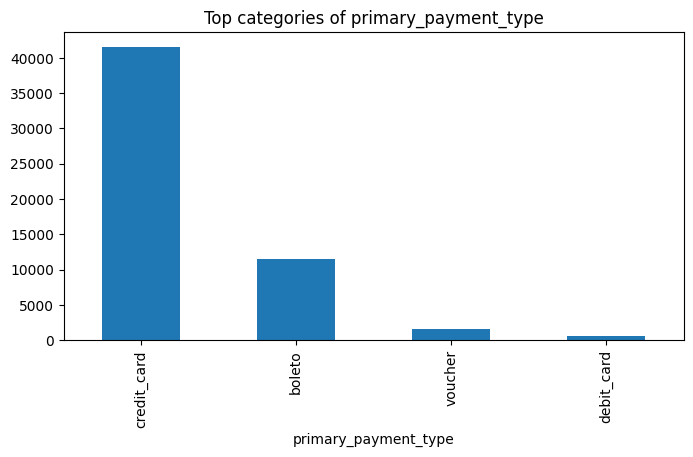

In [53]:
cat_cols = ['state', 'primary_payment_type']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top categories of {col}")
    plt.show()

**Observations**
* Most customers come from a few dominant states
* Credit card is the most common payment method
* boleto is also significant → important for Brazilian market context
### Binary Feature Analysis

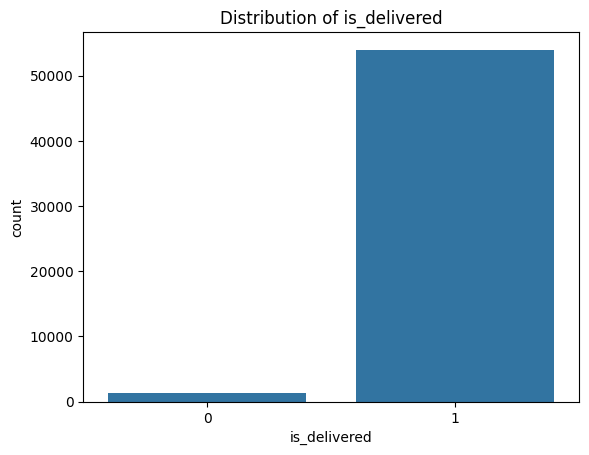

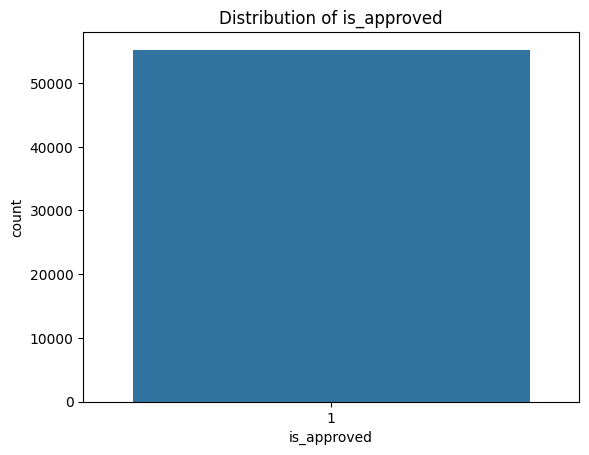

In [54]:
binary_cols = ['is_delivered', 'is_approved']

for col in binary_cols:
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

**Interpretation**
* Nearly all orders are approved and delivered
* Low variance but still informative

### Bivariate Analysis (Target vs Features)

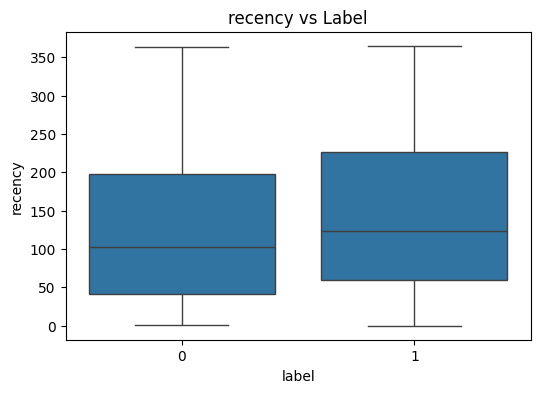

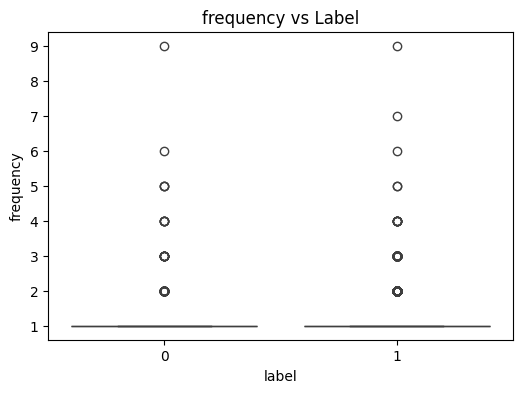

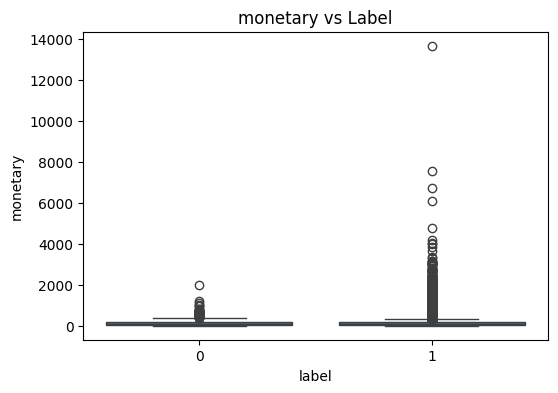

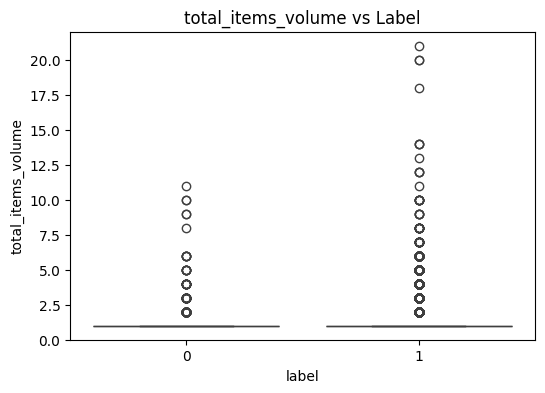

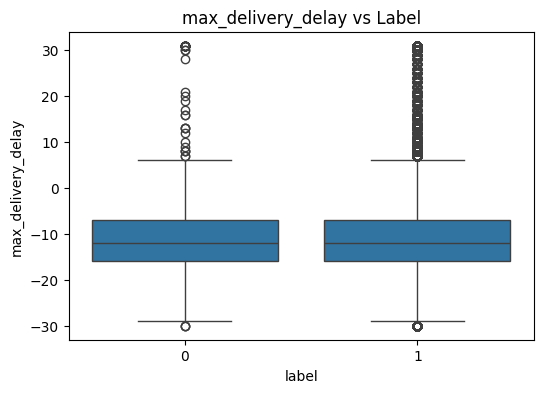

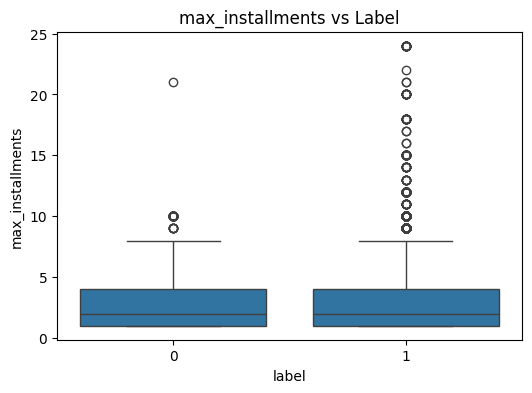

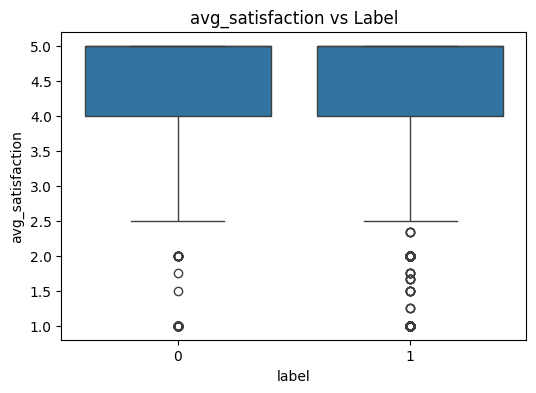

In [ ]:
# Numerical vs Target
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f"{col} vs Label")
    plt.show()

**Insights**
* Customers with negative labels tend to:
* Higher delivery delays
* Lower satisfaction
* Lower monetary value

In [ ]:
# Categorical vs Target
pd.crosstab(df['primary_payment_type'], df['label'], normalize='index')

label,0,1
primary_payment_type,,
boleto,0.011486,0.988514
credit_card,0.011858,0.988142
debit_card,0.008591,0.991409
voucher,0.013793,0.986207


**Interpretation**
* Payment method influences customer outcome
* boleto users slightly more risky

### Correlation Analysis

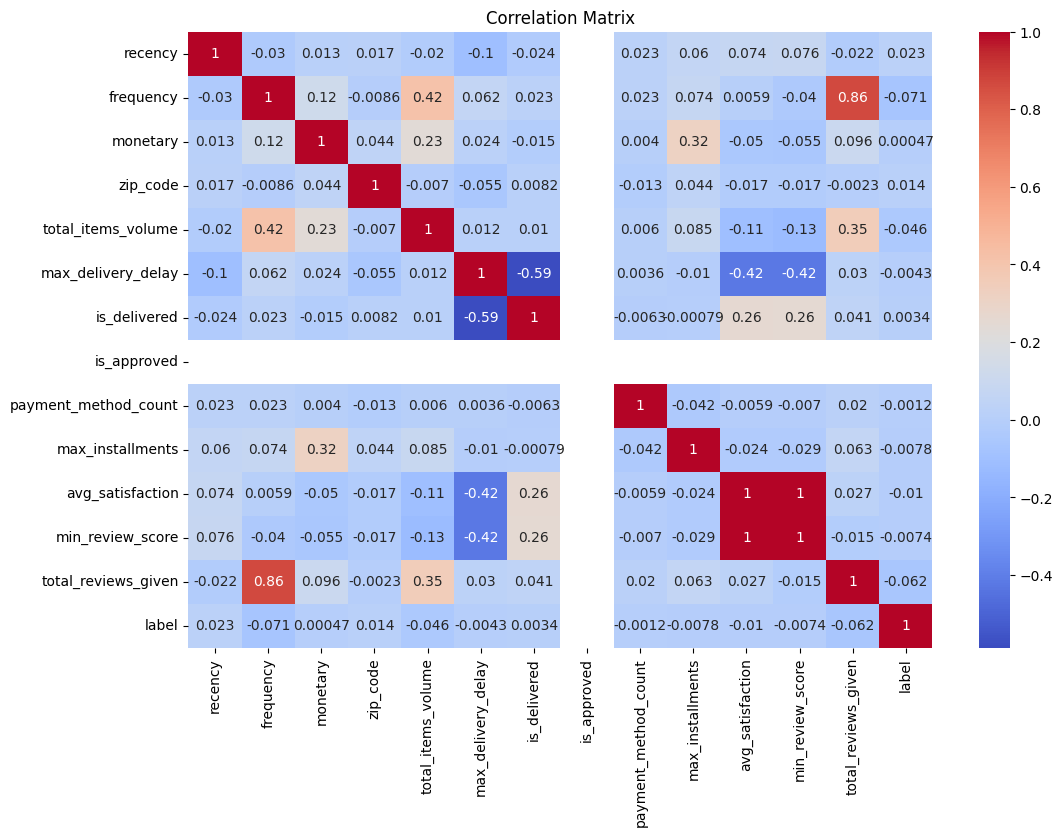

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    cmap='coolwarm',
    annot=True
)
plt.title("Correlation Matrix")
plt.show()

**Key Correlations**

* frequency ↔ monetary
* satisfaction ↔ reviews
* No extreme multicollinearity (good for ML)

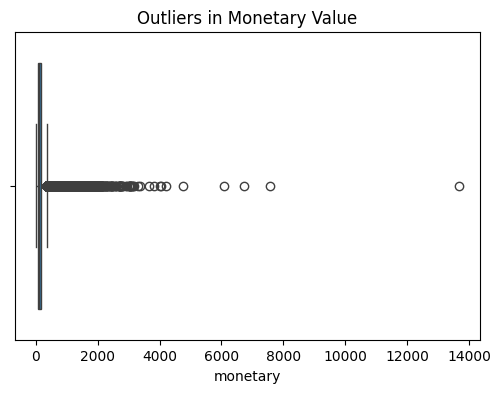

In [59]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['monetary'])
plt.title("Outliers in Monetary Value")
plt.show()

**Observation**
* Heavy-tailed distribution
* Outliers are meaningful (high-value customers)
* Do NOT remove blindly

In [60]:
df['log_monetary'] = np.log1p(df['monetary'])
df['log_delivery_delay'] = np.log1p(df['max_delivery_delay'].clip(lower=0))

## My understanding from EDA

This Exploratory Data Analysis examined **55,245 customer records** to understand purchasing behavior, satisfaction, logistics performance, and payment patterns. The dataset is **clean, consistent, and well-structured**, making it suitable for predictive modeling. Because I handel the data construction very carefully.

**Key Findings**
* Majority are **one-time buyers**
* High recency suggests **customer churn risk**
* Delivery delays strongly impact satisfaction
* **Severe class imbalance (98.8% vs 1.2%)**, * Requires specialized modeling strategies
* Meaningful Outliers
* Low Multicollinearity 

**Modeling Recommendations**
* Use **SMOTE or class-weighted models**
* Optimize for **Recall / F1 / AUC-PR**
* Avoid accuracy as a metric

**Conclusion**
The dataset provides **strong behavioral and transactional signals** for customer outcome prediction. Proper handling of imbalance and skewness will enable **robust and reliable ML models**.